In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
df = pd.read_csv('autism_screening.csv')
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


In [68]:
df.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [69]:
df['age'] = df['age'].fillna(df['age'].mean())

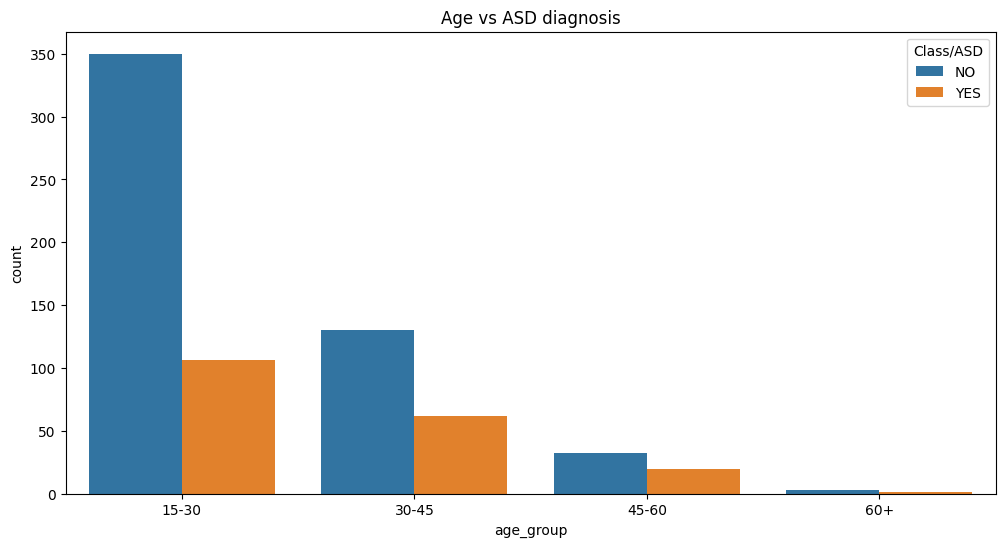

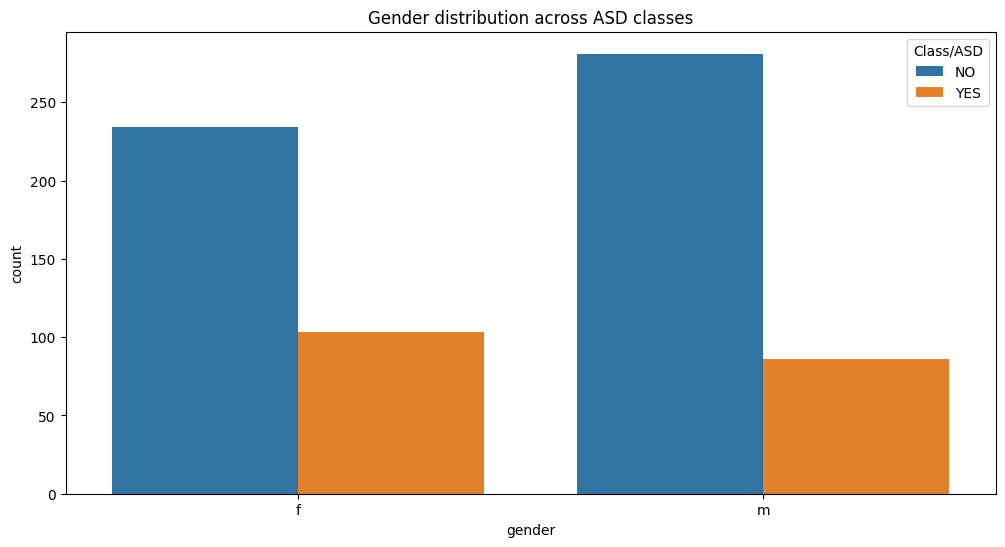

In [73]:
#Visualize:Age vs ASD diagnosis  ,Gender distribution across ASD classes
#lets make age group [15-30],[30-45],[45-60],[60+]
df['age_group'] = pd.cut(df['age'],bins=[15,30,45,60,np.inf],labels=['15-30','30-45','45-60','60+'])
plt.figure(figsize=(12,6))
sns.countplot(x='age_group',hue='Class/ASD',data=df)
plt.title('Age vs ASD diagnosis')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='gender',hue='Class/ASD',data=df)
plt.title('Gender distribution across ASD classes')
plt.show()

In [ ]:
df['ethnicity'].unique()

array(['White-European', 'Latino', '?', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish', 'others'], dtype=object)

In [ ]:
df['contry_of_res'].unique()

array(['United States', 'Brazil', 'Spain', 'Egypt', 'New Zealand',
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       'United Arab Emirates', 'Afghanistan', 'Lebanon', 'United Kingdom',
       'South Africa', 'Italy', 'Pakistan', 'Bangladesh', 'Chile',
       'France', 'China', 'Australia', 'Canada', 'Saudi Arabia',
       'Netherlands', 'Romania', 'Sweden', 'Tonga', 'Oman', 'India',
       'Philippines', 'Sri Lanka', 'Sierra Leone', 'Ethiopia', 'Viet Nam',
       'Iran', 'Costa Rica', 'Germany', 'Mexico', 'Russia', 'Armenia',
       'Iceland', 'Nicaragua', 'Hong Kong', 'Japan', 'Ukraine',
       'Kazakhstan', 'AmericanSamoa', 'Uruguay', 'Serbia', 'Portugal',
       'Malaysia', 'Ecuador', 'Niger', 'Belgium', 'Bolivia', 'Aruba',
       'Finland', 'Turkey', 'Nepal', 'Indonesia', 'Angola', 'Azerbaijan',
       'Iraq', 'Czech Republic', 'Cyprus'], dtype=object)

In [20]:
df.sample(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
475,1,0,0,0,0,1,0,1,0,0,...,f,Asian,no,no,India,no,3.0,18 and more,Self,NO
324,1,0,0,0,0,0,0,0,0,1,...,f,?,no,no,United Arab Emirates,no,2.0,18 and more,?,NO
480,1,0,0,0,1,0,1,1,0,0,...,f,Asian,no,no,Sri Lanka,no,4.0,18 and more,Self,NO
534,0,0,0,1,1,0,1,0,0,1,...,f,?,no,no,Iran,no,4.0,18 and more,?,NO
268,1,0,1,1,1,0,0,1,0,0,...,f,White-European,no,no,United States,no,5.0,18 and more,Self,NO
154,1,0,0,0,1,0,1,0,0,1,...,m,Asian,no,no,Sri Lanka,no,4.0,18 and more,Self,NO
530,1,0,0,0,1,0,0,0,0,0,...,f,Black,no,no,France,no,2.0,18 and more,Self,NO
688,1,0,1,1,1,1,1,0,1,1,...,m,Black,no,no,Canada,no,8.0,18 and more,Self,YES
109,1,0,0,0,0,1,1,0,0,0,...,f,Asian,no,no,India,no,3.0,18 and more,Parent,NO
206,1,1,1,1,1,1,1,1,1,1,...,m,Middle Eastern,no,yes,United States,no,10.0,18 and more,Parent,YES


In [ ]:
df['age_desc'].unique()

array(['18 and more'], dtype=object)

In [ ]:
df['jundice'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [51]:
#coloums to drop ethnicity,country_of_res,used_app_before,result,age_desc,relation
X = df.drop(['ethnicity','contry_of_res','used_app_before','result','age_desc','relation','Class/ASD','age_group'],axis=1)
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,f,no,no
700,1,0,0,0,0,0,0,1,0,1,34.0,m,no,no
701,1,0,1,1,1,0,1,1,0,1,24.0,f,no,no
702,1,0,0,1,1,0,1,0,1,1,35.0,m,no,no


In [52]:
X.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [53]:
y = df['Class/ASD']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y.shape

(704,)

In [54]:
#now lets encode the categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])
X['jundice'] = le.fit_transform(X['jundice'])
X['austim'] = le.fit_transform(X['austim'])

#now the Normalize the age
scaler = StandardScaler()
X['age'] = scaler.fit_transform(X[['age']])

In [55]:
X.shape

(704, 14)

In [56]:
#lets divide the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [82]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dropout(0.4),
    Dense(1,activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
epochs = model.fit(X_train,y_train,batch_size = 32,epochs =30,validation_split=0.2,verbose=1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)])


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6265 - loss: 0.6641 - val_accuracy: 0.7876 - val_loss: 0.5955
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7587 - loss: 0.5965 - val_accuracy: 0.8230 - val_loss: 0.5221
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8088 - loss: 0.5228 - val_accuracy: 0.8850 - val_loss: 0.4433
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8273 - loss: 0.4888 - val_accuracy: 0.9292 - val_loss: 0.3586
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8209 - loss: 0.4374 - val_accuracy: 0.9469 - val_loss: 0.2959
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8903 - loss: 0.3512 - val_accuracy: 0.9469 - val_loss: 0.2277
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9064 - loss: 0.3001 - val_accuracy: 0.9646 - val_loss: 0.1881
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9070 - loss: 0.2546 - val_accuracy: 0.9646 - val_loss

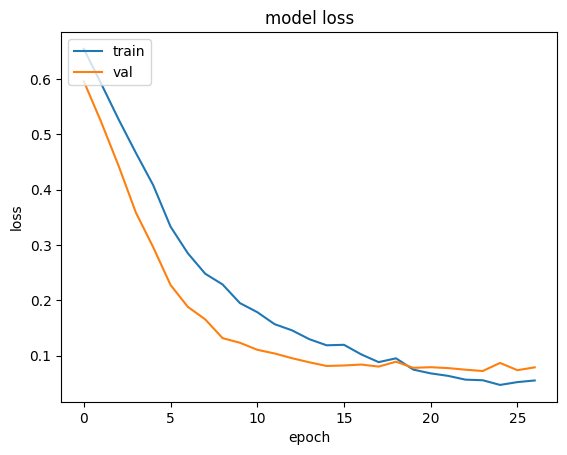

In [85]:
#val_loss vs loss graph
plt.plot(epochs.history['loss'])
plt.plot(epochs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

#it seems like model is good

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


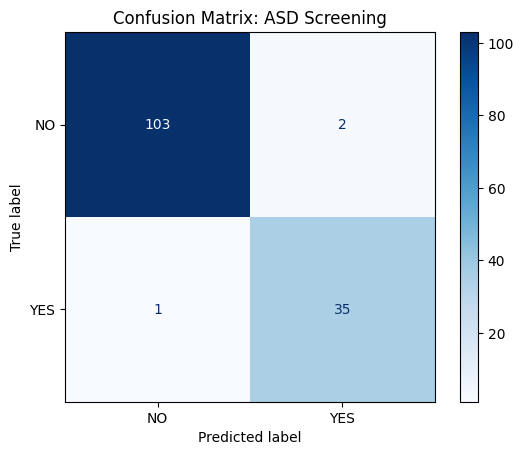

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NO', 'YES'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: ASD Screening')
plt.show()

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.99      0.98      0.99       105
         YES       0.95      0.97      0.96        36

    accuracy                           0.98       141
   macro avg       0.97      0.98      0.97       141
weighted avg       0.98      0.98      0.98       141



In [93]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score

# Define a custom scorer for Keras models
def custom_accuracy_scorer(estimator, X, y_true):
    # Keras model.predict() returns probabilities for binary classification
    y_pred_probs = estimator.predict(X)
    # Convert probabilities to binary class labels (0 or 1)
    y_pred_classes = (y_pred_probs > 0.5).astype("int32")
    return accuracy_score(y_true, y_pred_classes)

# 1. Calculate the importance
# This shuffles each feature one by one and sees how much the accuracy drops
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring=custom_accuracy_scorer)

# 2. Organize the data
feature_names = X.columns # Assuming X is your dataframe of features
importance_df = pd.DataFrame({'feature': feature_names, 'importance': result.importances_mean})
importance_df = importance_df.sort_values(by='importance', ascending=False)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━

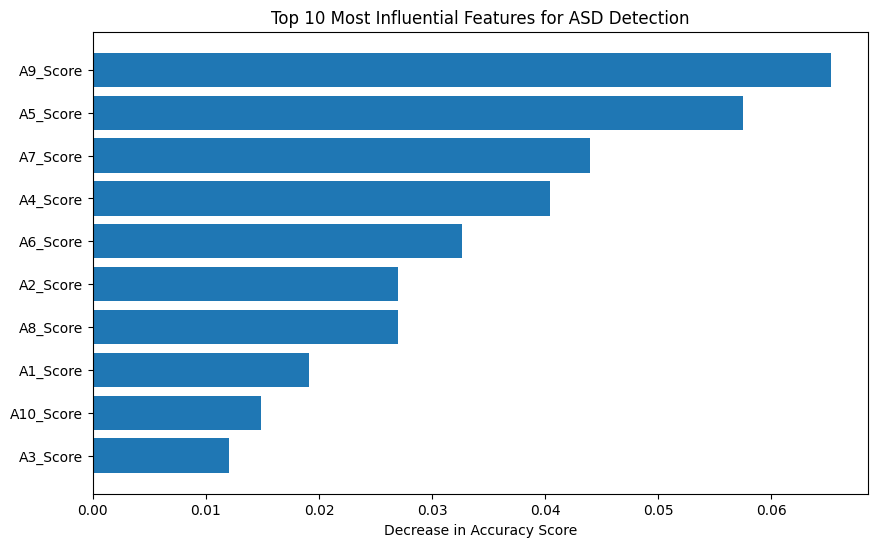

In [94]:
# 3. Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10])
plt.xlabel("Decrease in Accuracy Score")
plt.title("Top 10 Most Influential Features for ASD Detection")
plt.gca().invert_yaxis()
plt.show()

In [104]:
res = model.predict(X_test[:3])
for i in range(3):
  if(res[i][0]<0.5):
    print("NO")
  else:
    print("YES")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
YES
NO
YES


In [105]:
# Save the Keras model
model.save('asd_model.keras')
# Save your Scaler (Important: Streamlit needs the exact same scaling)
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [107]:
#input fileds
X.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'austim'],
      dtype='object')